In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fetch_california_housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


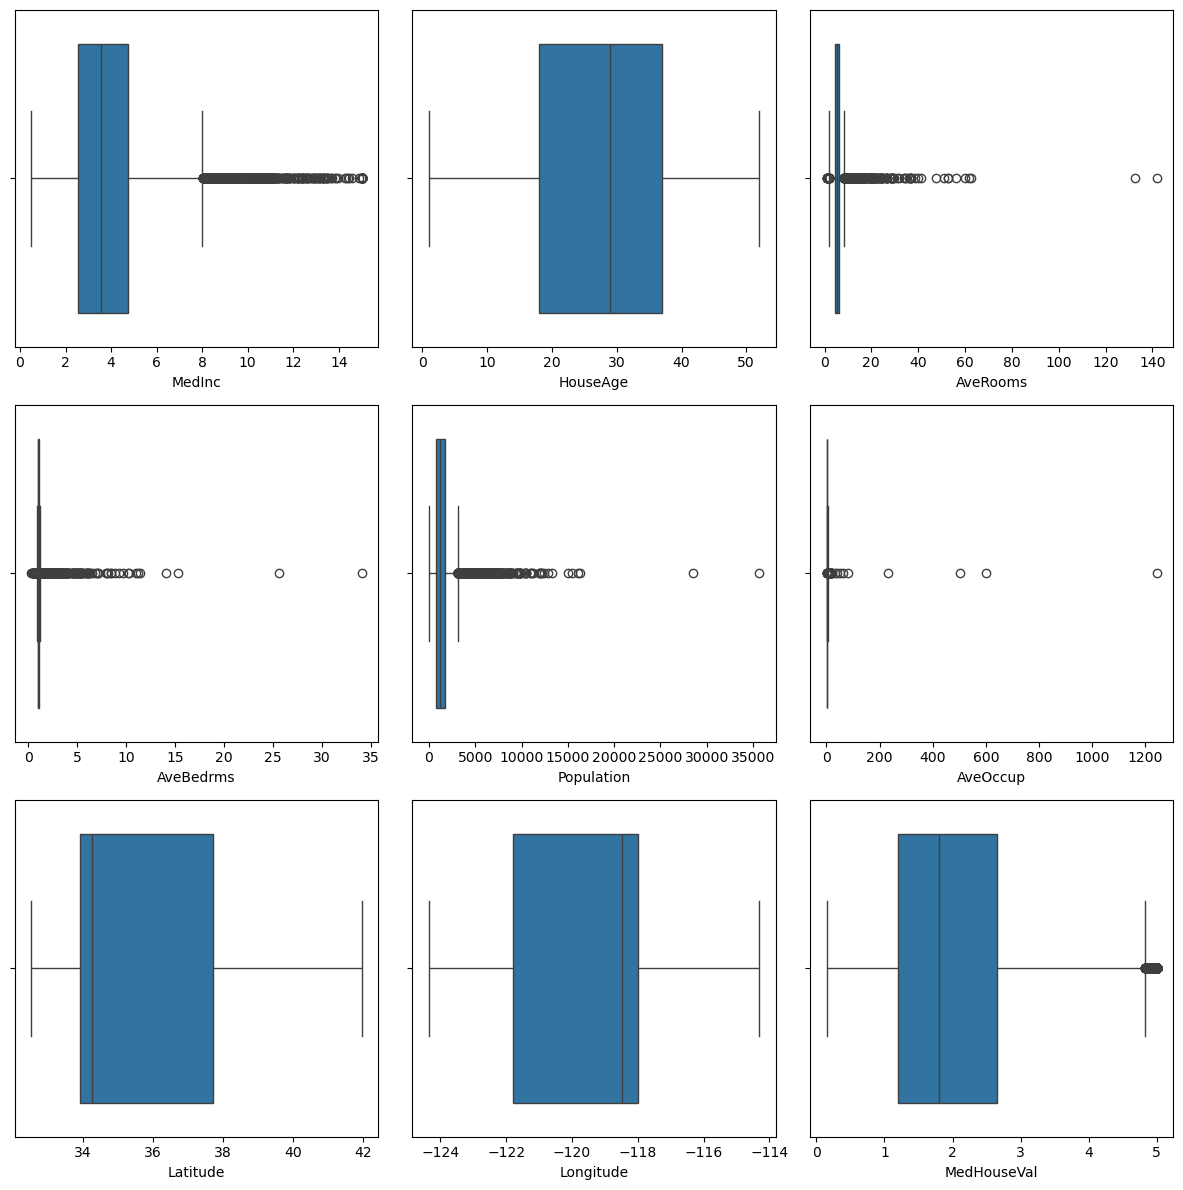

In [7]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 12))
cols = df.columns.to_list()
k = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(x = df[cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

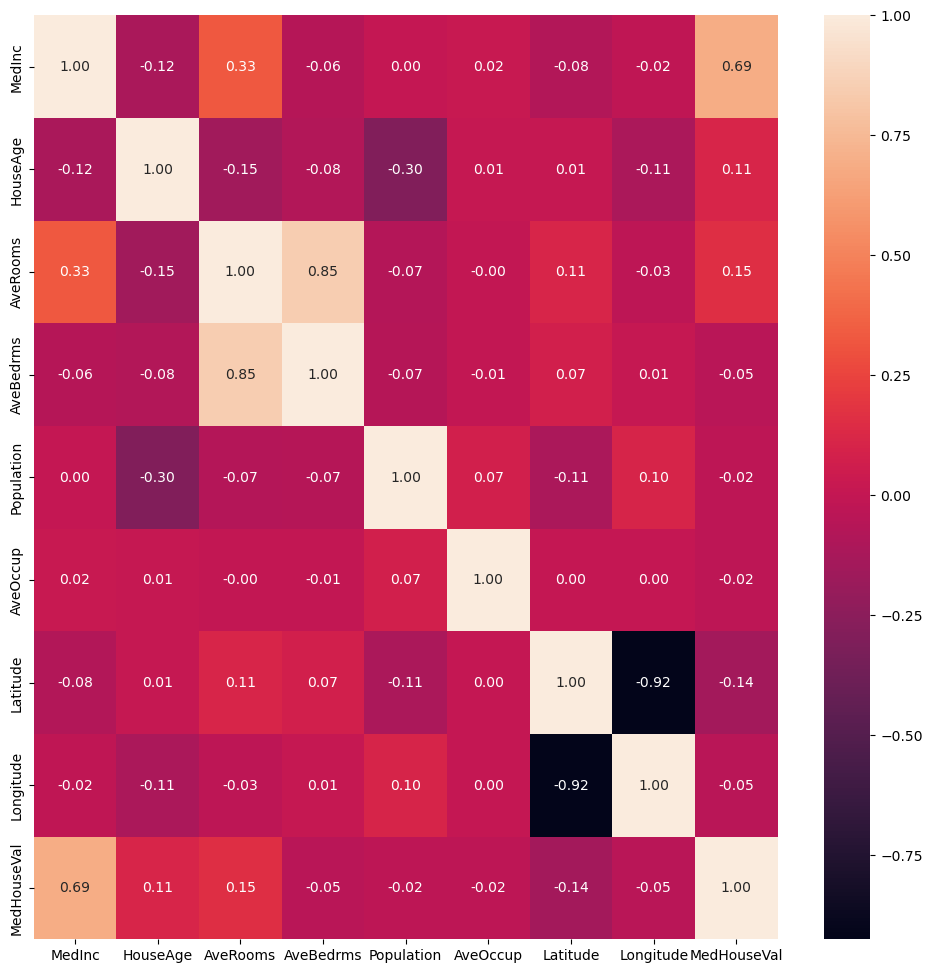

In [9]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

In [11]:
df.shape

(20640, 9)

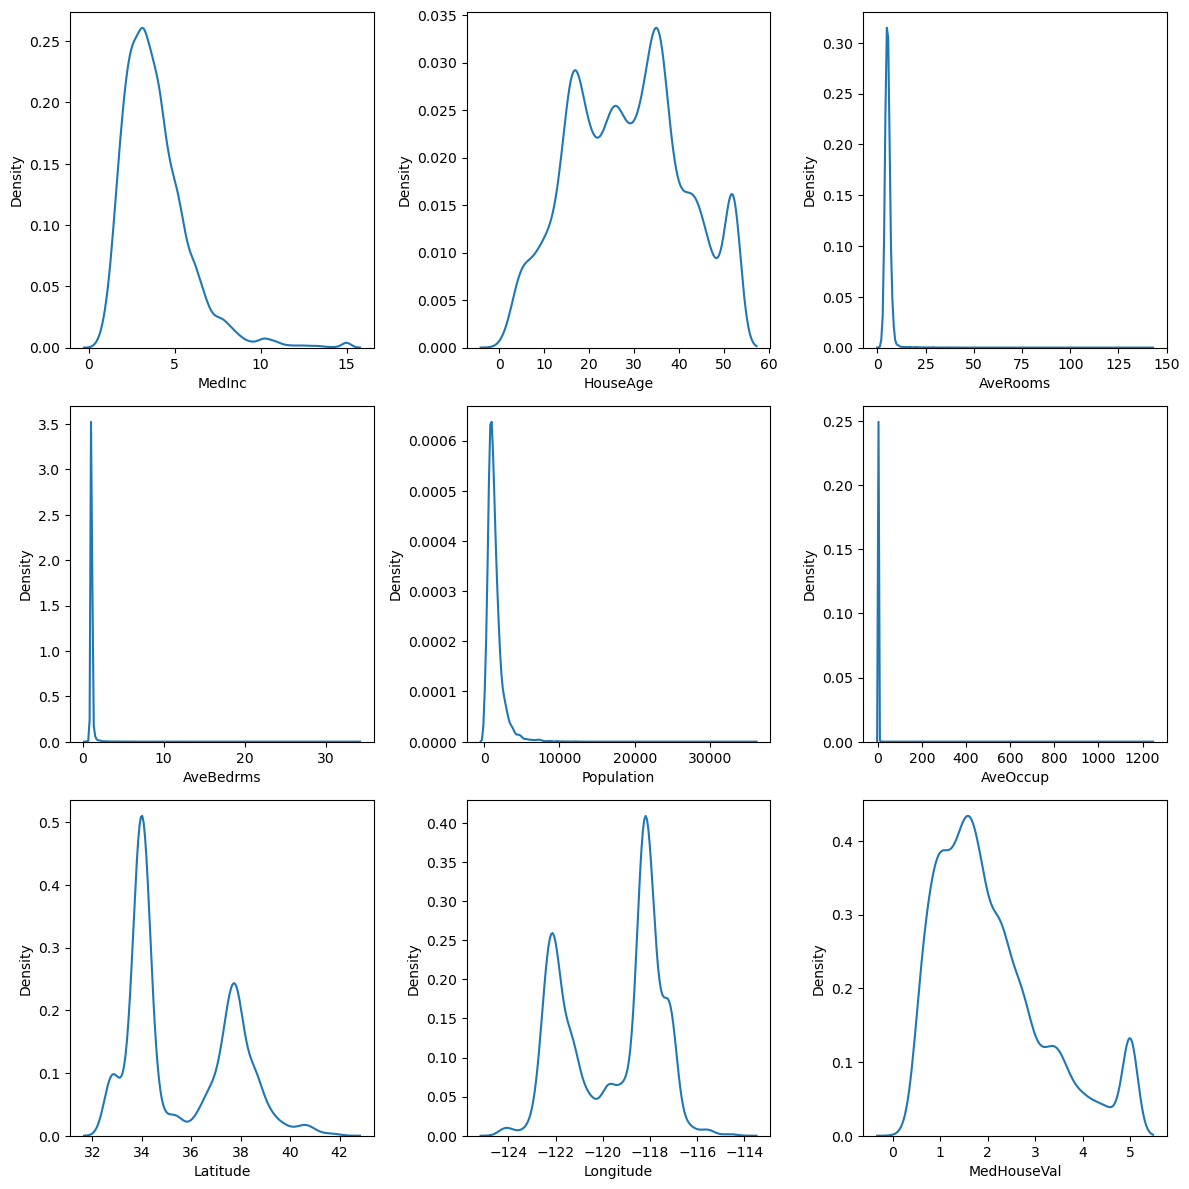

In [12]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 12))
cols = df.columns.to_list()
k = 0
for i in range(3):
    for j in range(3):
        sns.kdeplot(x = df[cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [79]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    l_l = q1 - 1.5 * iqr
    u_l = q3 + 1.5 * iqr

    return l_l, u_l    

In [80]:
cols = df.drop("MedHouseVal", axis = 1).columns.to_list()

In [81]:
for col in cols:
    l_l, u_l = remove_outliers(df, col)
    df.loc[df[col] > u_l, col] = u_l
    df.loc[df[col] < l_l, col] = l_l

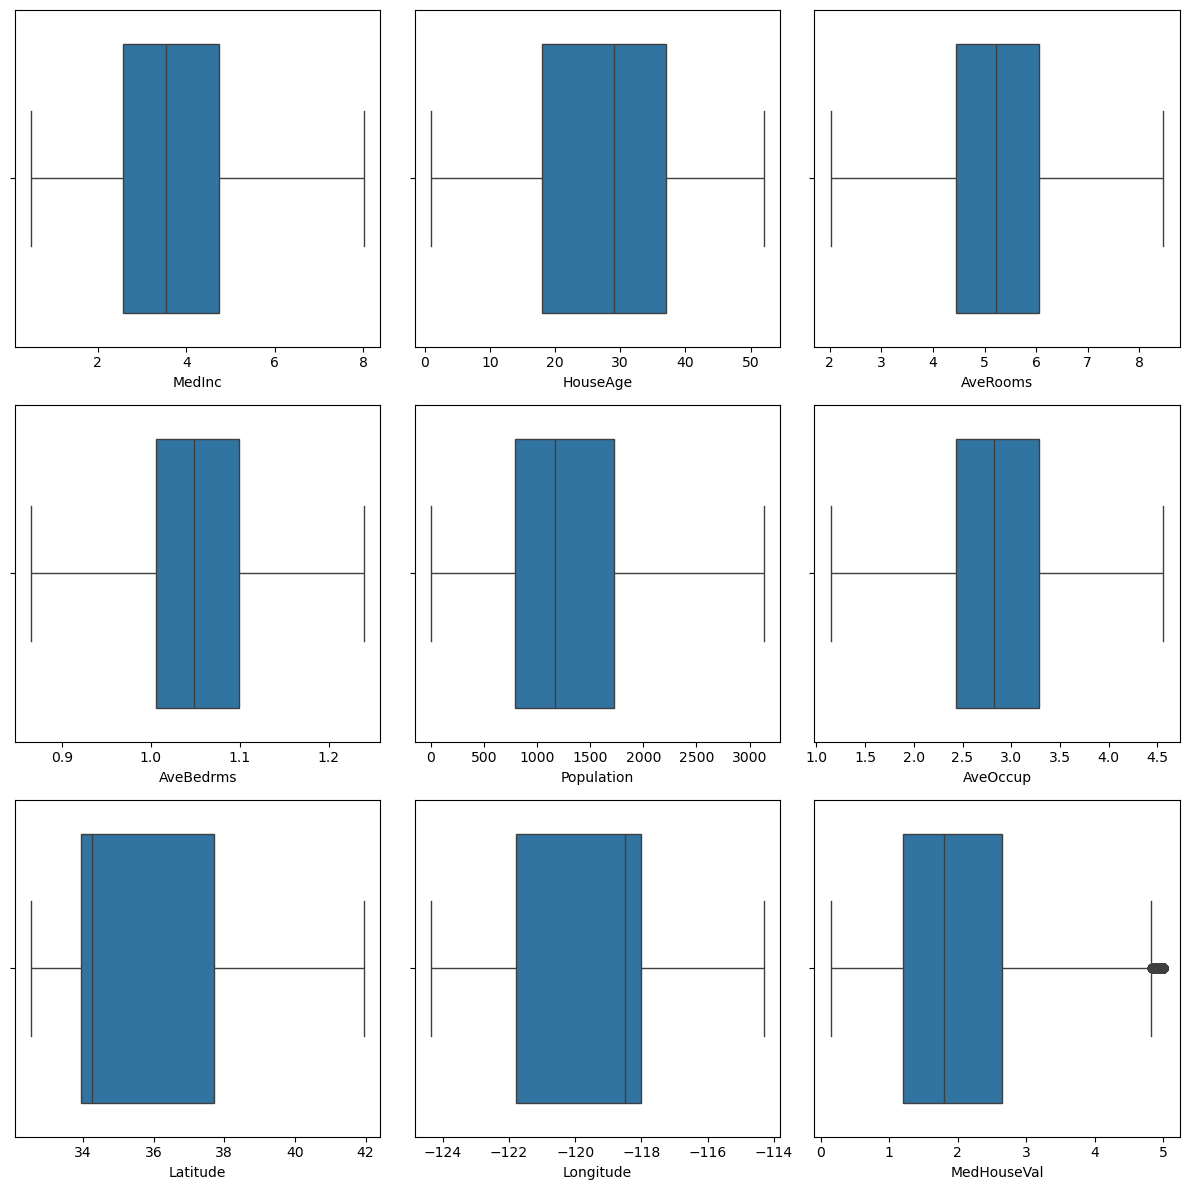

In [82]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 12))
cols = df.columns.to_list()
k = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(x = df[cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
ssr = StandardScaler()
X_train = ssr.fit_transform(X_train)
X_test = ssr.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

### Ada Boost Regressor

In [16]:
abr = AdaBoostRegressor(estimator = DecisionTreeRegressor())

In [25]:
param_grid = {
    "n_estimators" : [50, 100, 150, 200],
    "learning_rate" : [0.01, 0.1, 0.2, 0.3, 0.4],
    "estimator__max_depth" : [1, 2, 3, 4, 5, 6]
}

In [26]:
abr_cv = GridSearchCV(estimator = abr, param_grid = param_grid, cv = 3, n_jobs = -1)

In [27]:
X = df.drop("MedHouseVal", axis = 1)
y = df["MedHouseVal"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [29]:
abr_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [50, 100, 150, 200]})

In [30]:
abr_cv.best_score_

0.7201623623320687

In [32]:
best_abr = abr_cv.best_estimator_
best_abr.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  learning_rate=0.1, n_estimators=100)

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, best_abr.predict(X_test))

0.7149151766230036

### Extra Trees Regressor

In [36]:
etr = ExtraTreesRegressor()
param_grid = {
    "max_depth" : [3, 4, 5, 6, 7],
    "criterion" : ["squared_error", "absolute_error", "poisson"],
    "min_samples_split" : [7, 8, 9]
}

In [37]:
etr_cv = GridSearchCV(estimator = etr, param_grid = param_grid, cv = 3, n_jobs = -1)

In [38]:
etr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [7, 8, 9]})

In [62]:
etr_cv.best_score_

0.6193915502291595

### Gradient Boosting Regressor

In [43]:
gbr = GradientBoostingRegressor()
param_grid = {
      "n_estimators" : [100, 150, 200, 250, 300],
      "max_depth" : [3, 4, 5]  
}
gbr_cv = GridSearchCV(gbr, param_grid = param_grid, cv = 3, n_jobs = -1)

In [44]:
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [45]:
gbr_cv.best_score_

0.8273508755453426

In [46]:
best_gbr = gbr_cv.best_estimator_

In [47]:
best_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [49]:
r2_score(y_test, best_gbr.predict(X_test))

0.8418537664418935

### Random Forest Regressor

In [85]:
param_grid = {
        "n_estimators" : [100, 150, 200, 250, 300],
        "max_depth" : [4,5,7,8],
        "min_samples_split" : [2, 3, 4]
}

In [86]:
rfr_cv = GridSearchCV(RandomForestRegressor(), n_jobs = -1, param_grid = param_grid, cv = 3)

In [87]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [88]:
rfr_cv.best_score_

0.7505608281012237

In [92]:
rfr = rfr_cv.best_estimator_
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred)

0.761185982573468

In [93]:
rfr.feature_importances_

array([0.63778906, 0.04347657, 0.02209712, 0.00936144, 0.0114021 ,
       0.14248484, 0.06916174, 0.06422713])

### XGBoost

In [94]:
import xgboost as xgb

In [95]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [96]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Use a regression-specific objective
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': 'rmse'  # Root Mean Squared Error for evaluation
}

In [97]:
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10)

[0]	train-rmse:1.08152	eval-rmse:1.06707
[1]	train-rmse:1.01533	eval-rmse:1.00284
[2]	train-rmse:0.95445	eval-rmse:0.94443
[3]	train-rmse:0.90287	eval-rmse:0.89459
[4]	train-rmse:0.85603	eval-rmse:0.84975
[5]	train-rmse:0.81549	eval-rmse:0.81201
[6]	train-rmse:0.77959	eval-rmse:0.77796
[7]	train-rmse:0.74715	eval-rmse:0.74750
[8]	train-rmse:0.71918	eval-rmse:0.72150
[9]	train-rmse:0.69385	eval-rmse:0.69769
[10]	train-rmse:0.67191	eval-rmse:0.67772
[11]	train-rmse:0.65140	eval-rmse:0.65907
[12]	train-rmse:0.63440	eval-rmse:0.64380
[13]	train-rmse:0.61753	eval-rmse:0.62911
[14]	train-rmse:0.60443	eval-rmse:0.61703
[15]	train-rmse:0.59151	eval-rmse:0.60600
[16]	train-rmse:0.57871	eval-rmse:0.59472
[17]	train-rmse:0.56849	eval-rmse:0.58631
[18]	train-rmse:0.56018	eval-rmse:0.57981
[19]	train-rmse:0.55164	eval-rmse:0.57211
[20]	train-rmse:0.54456	eval-rmse:0.56608
[21]	train-rmse:0.53820	eval-rmse:0.56134
[22]	train-rmse:0.53349	eval-rmse:0.55804
[23]	train-rmse:0.52682	eval-rmse:0.55242
[2

E:\Anaconda\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[36]	train-rmse:0.45933	eval-rmse:0.50244
[37]	train-rmse:0.45650	eval-rmse:0.50072
[38]	train-rmse:0.45384	eval-rmse:0.49914
[39]	train-rmse:0.45131	eval-rmse:0.49800
[40]	train-rmse:0.44832	eval-rmse:0.49586
[41]	train-rmse:0.44621	eval-rmse:0.49470
[42]	train-rmse:0.44448	eval-rmse:0.49410
[43]	train-rmse:0.44286	eval-rmse:0.49360
[44]	train-rmse:0.44088	eval-rmse:0.49244
[45]	train-rmse:0.43890	eval-rmse:0.49154
[46]	train-rmse:0.43669	eval-rmse:0.48976
[47]	train-rmse:0.43487	eval-rmse:0.48882
[48]	train-rmse:0.43280	eval-rmse:0.48821
[49]	train-rmse:0.43130	eval-rmse:0.48763
[50]	train-rmse:0.42968	eval-rmse:0.48617
[51]	train-rmse:0.42763	eval-rmse:0.48525
[52]	train-rmse:0.42636	eval-rmse:0.48475
[53]	train-rmse:0.42464	eval-rmse:0.48364
[54]	train-rmse:0.42318	eval-rmse:0.48284
[55]	train-rmse:0.42119	eval-rmse:0.48167
[56]	train-rmse:0.42016	eval-rmse:0.48129
[57]	train-rmse:0.41891	eval-rmse:0.48055
[58]	train-rmse:0.41708	eval-rmse:0.47945
[59]	train-rmse:0.41507	eval-rmse:

In [98]:
# Make predictions
y_pred = bst.predict(dtest)

In [99]:
r2_score(y_test, y_pred)

0.8439830212930434

### Stacking Regressor

In [100]:
from sklearn.svm import SVR

In [101]:
estimators = [
              ("lr", LinearRegression())
             ,("dtr", DecisionTreeRegressor())
             ,("svr", SVR())
             ]

In [102]:
clf = StackingRegressor(
                estimators = estimators,
                final_estimator = RandomForestRegressor(),
                cv = 10,
                n_jobs = -1
)

In [103]:
from sklearn.preprocessing import StandardScaler

In [105]:
clf.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('dtr', DecisionTreeRegressor()),
                              ('svr', SVR())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [106]:
y_pred = clf.predict(X_test)

In [107]:
r2_score(y_test, y_pred)

0.7546414897062301